# Projek Uas Machine Learning
## PROJEK PEMAHAMAN TINGKAT CHURN: PENDEKATAN DECISION TREE RANDOM FOREST DALAM ANALISIS BANK
### Kelompok 2

### Joe Marcello - 00000073881
### Muhammad Evan Julian Priyasa- 00000072402
### Febianus Felix Widisulistiyo- 00000072737
### Rivaldo Yosia Himawan - 0000071997
071997


# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
import sklearn.tree as tree
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Import dataset

In [2]:
churn = pd.read_csv('churn.csv')
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# dataset describe

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# EDA

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


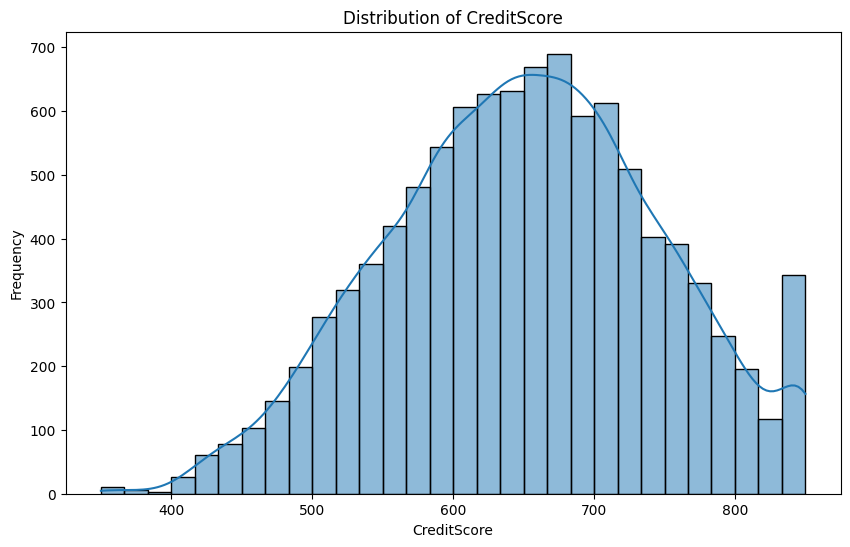

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='CreditScore', bins=30, kde=True)
plt.title('Distribution of CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


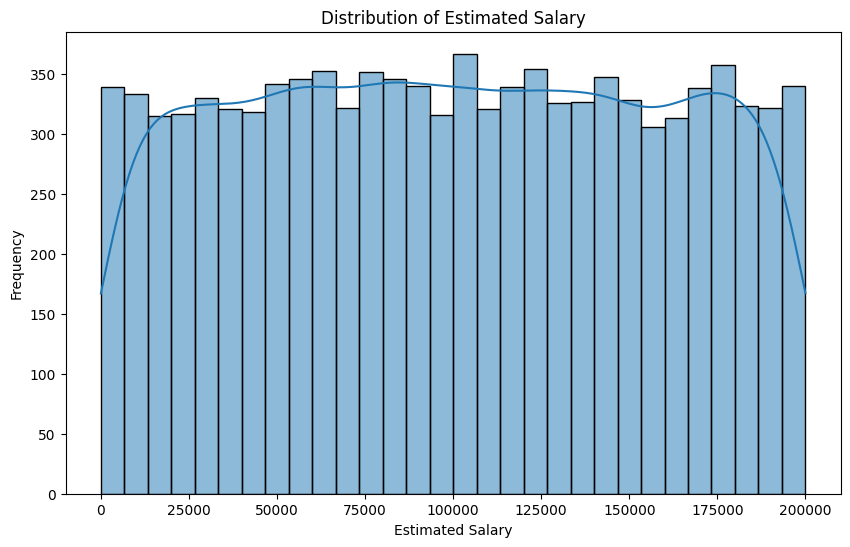

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='EstimatedSalary', bins=30, kde=True)
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

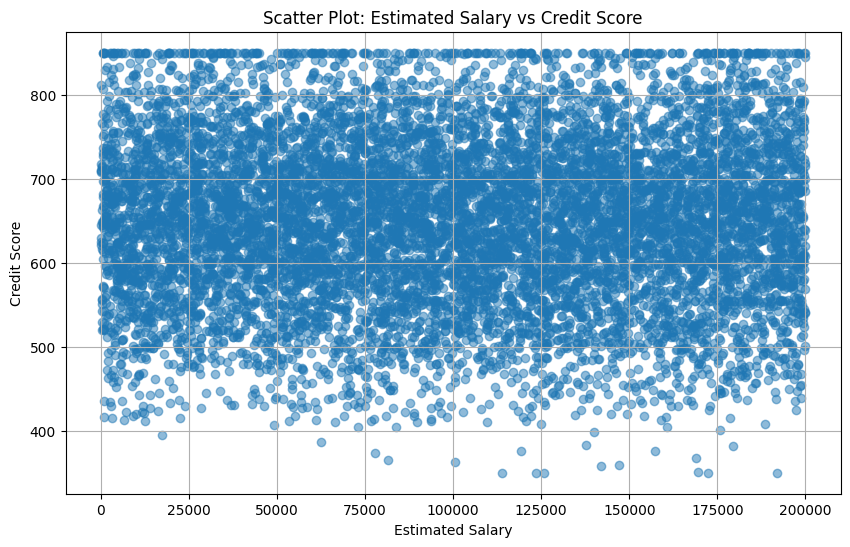

In [6]:
balance = churn['Balance']
estimated_salary = churn['EstimatedSalary']
creditscore = churn['CreditScore']

plt.figure(figsize=(10, 6))
plt.scatter(estimated_salary, creditscore, alpha=0.5)
plt.title('Scatter Plot: Estimated Salary vs Credit Score')
plt.xlabel('Estimated Salary')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


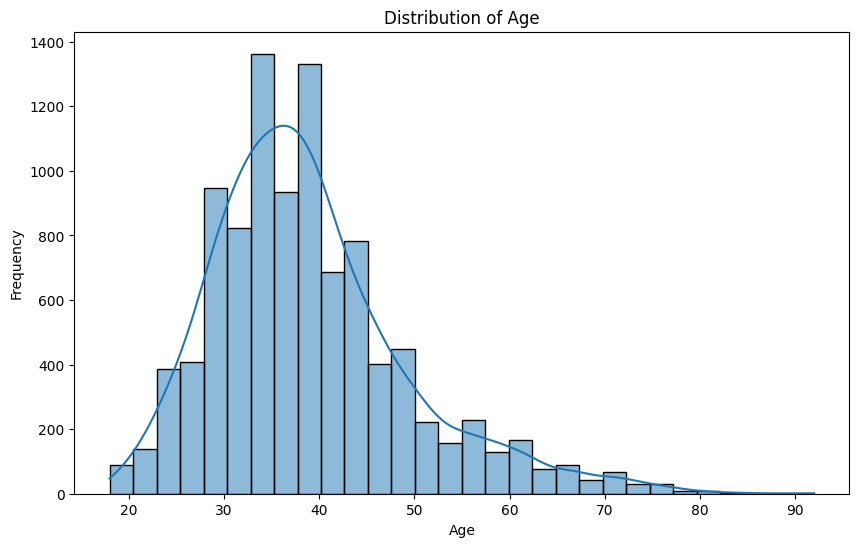

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

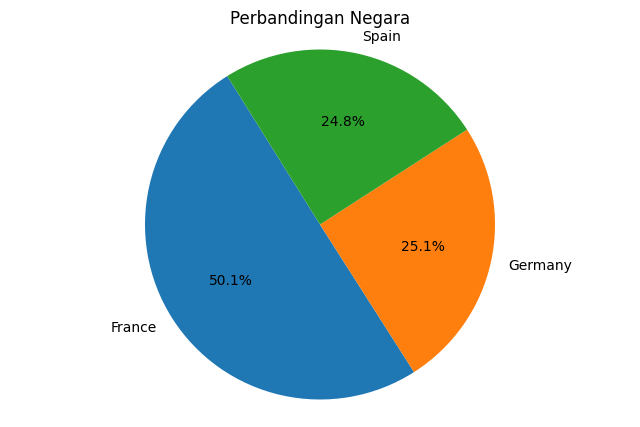

In [8]:
column_to_visualize = 'Geography'
value_counts = churn[column_to_visualize].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=122)
plt.title('Perbandingan Negara')
plt.axis('equal')  # Memastikan pie chart terlihat lingkaran
plt.show()

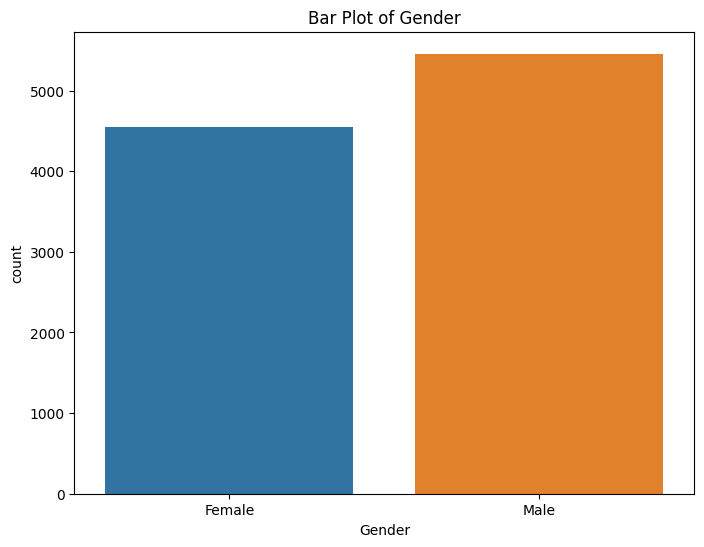

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=churn)
plt.title('Bar Plot of Gender')
plt.show()

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


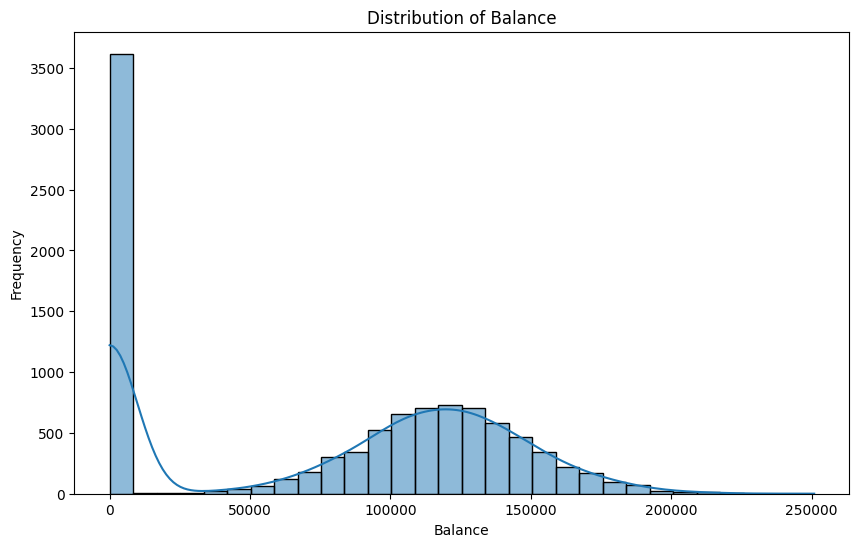

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Balance', bins=30, kde=True)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

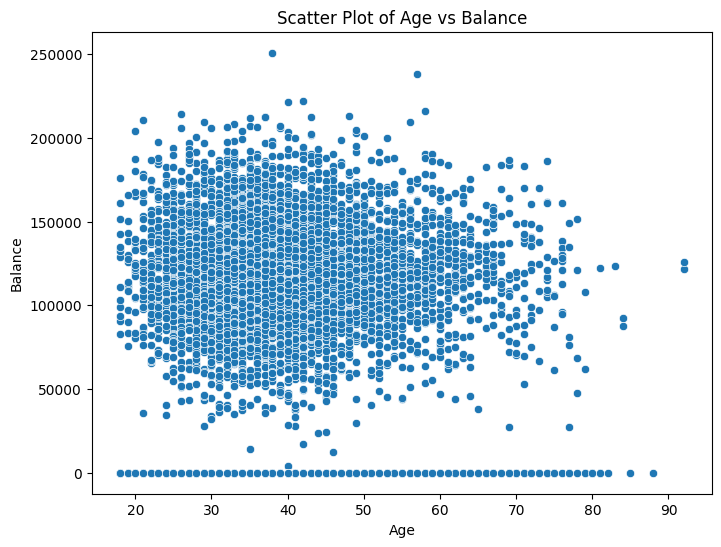

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Balance', data=churn)
plt.title('Scatter Plot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

# Check Nulls

In [12]:
null_counts = churn.isnull().sum()
print(null_counts)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# Fitur Selection

In [13]:
churn = churn.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encoding

In [14]:
label_encoder = LabelEncoder()
churn['Geography'] = label_encoder.fit_transform(churn['Geography'])

# Remove Outlier

In [15]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Felix\anaco

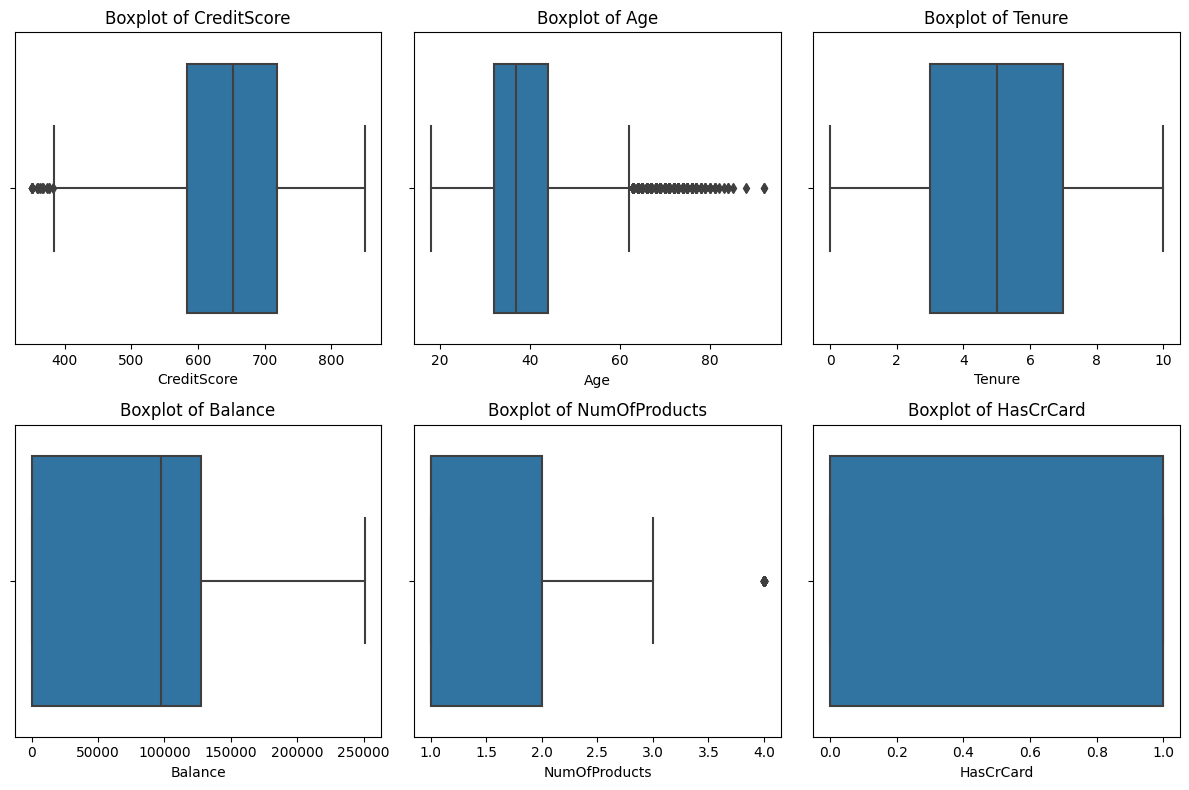

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


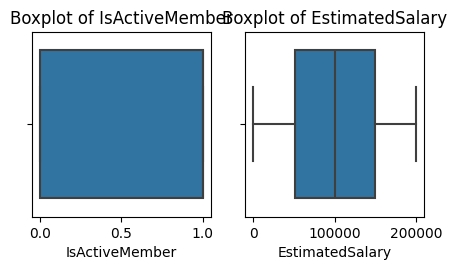

In [16]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i % 6 + 1)  # Adjusting subplot index to cycle between 1-6
    sns.boxplot(x=churn[col], orient='v')
    plt.title(f'Boxplot of {col}')
    if i % 6 == 5 or i == len(numerical_columns) - 1:  # Add plt.show() after every 6 subplots
        plt.tight_layout()
        plt.show()

In [17]:
def detect_outliers_iqr(churn, column):
    Q1 = churn[column].quantile(0.25)
    Q3 = churn[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = churn[(churn[column] < lower_bound) | (churn[column] > upper_bound)]
    return outliers

outliers_dict = {}
for col in numerical_columns:
    outliers_dict[col] = detect_outliers_iqr(churn, col)

for col, outliers in outliers_dict.items():
    print(f"Outliers for column '{col}':")
    print(outliers)
    print("\n")


Outliers for column 'CreditScore':
      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
7             376          1  Female   29       4  115046.74              4   
942           376          0  Female   46       6       0.00              1   
1193          363          2  Female   28       6  146098.43              3   
1405          359          0  Female   44       6  128747.69              1   
1631          350          2    Male   54       1  152677.48              1   
1838          350          1    Male   39       0  109733.20              2   
1962          358          2  Female   52       8  143542.36              3   
2473          351          1  Female   57       4  163146.46              1   
2579          365          1    Male   30       0  127760.07              1   
8154          367          2    Male   42       6   93608.28              1   
8723          350          0    Male   51      10       0.00              1   
8762          350

In [18]:
def remove_outliers_iqr(churn, column):
    Q1 = churn[column].quantile(0.25)
    Q3 = churn[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    churn_filtered = churn[(churn[column] >= lower_bound) & (churn[column] <= upper_bound)]
    return churn_filtered

churn_cleaned = churn.copy()  # Membuat salinan DataFrame untuk keperluan pemrosesan
for col in numerical_columns:
    churn_cleaned = remove_outliers_iqr(churn_cleaned, col)

print("Jumlah outlier yang dihapus:", len(churn) - len(churn_cleaned))

Jumlah outlier yang dihapus: 432


# Normalisasi

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
churn_cleaned[numerical_columns] = scaler.fit_transform(churn_cleaned[numerical_columns])

# MODELING

# Splt X Y train Test

In [20]:
X = churn_cleaned[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
Y = churn_cleaned[['Exited']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fitur Importance

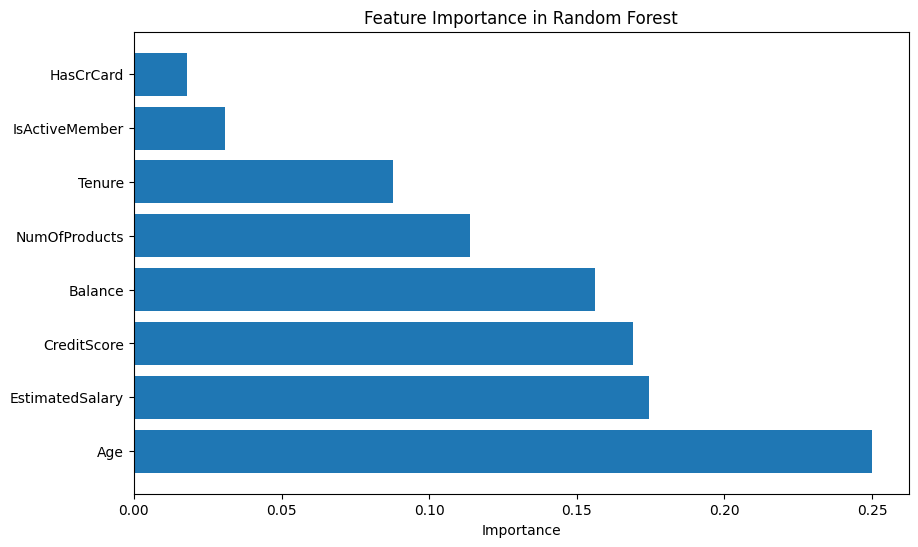

Accuracy of Random Forest on Test Data: 0.8568


In [21]:
# Initialize Random Forest classifier with n_estimators = 100
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest modelA
model_rf.fit(X_train, Y_train.values.ravel())  # ravel Y_train to convert it to 1D array

# Calculate feature importances
feature_importances = model_rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort feature importances by importance v+alue in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

# Evaluate accuracy of the Random Forest model on test data
accuracy_rf = model_rf.score(X_test, Y_test)
print(f"Accuracy of Random Forest on Test Data: {accuracy_rf:.4f}")

# Correlation

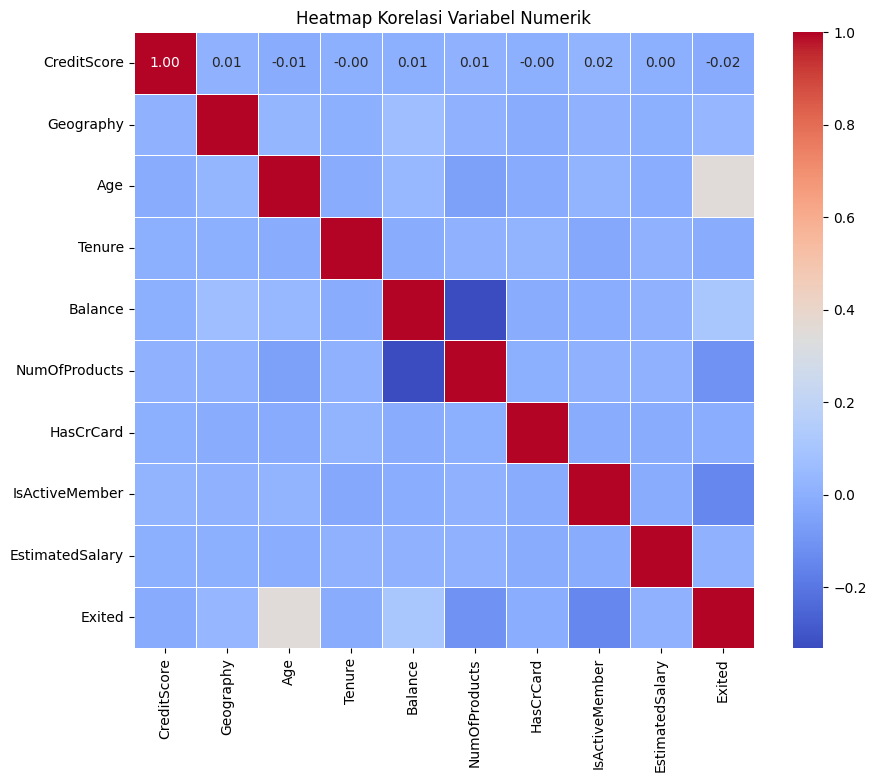

In [22]:
# Filter hanya variabel numerik (berdasarkan asumsi)
numeric_columns = churn_cleaned.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Menghitung korelasi antar variabel numerik
correlation_matrix = churn_cleaned[numeric_columns].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))  # Ukuran heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

# X Y Cross Validation

In [23]:
model = RandomForestClassifier()
cv_scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
model.fit(X_train, Y_train.values.ravel())

y_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)

Cross-validation Accuracy Scores: [0.85303723 0.84911822 0.85042456 0.84258654 0.84313725]
Mean Accuracy: 0.8476607625414634
Test Set Accuracy: 0.8599791013584117


# Decision Tree Non MAX DEPTH

In [24]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

print (pred [0:5])
print(Y_test[0:5])

[0 0 0 0 1]
      Exited
2616       0
9841       0
9132       0
9494       1
5179       0


In [25]:
# Measure accuracy on the test set
test_accuracy = accuracy_score(Y_test, pred)
print("Decision Tree Accuracy (Test): {:.3f}".format(test_accuracy))

# Measure accuracy on the training set
train_accuracy = accuracy_score(Y_train, model.predict(X_train))
print("Decision Tree Accuracy (Train): {:.3f}".format(train_accuracy))

Decision Tree Accuracy (Test): 0.780
Decision Tree Accuracy (Train): 1.000


In [26]:
from sklearn import metrics

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(Y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1524
           1       0.46      0.47      0.46       390

    accuracy                           0.78      1914
   macro avg       0.66      0.66      0.66      1914
weighted avg       0.78      0.78      0.78      1914



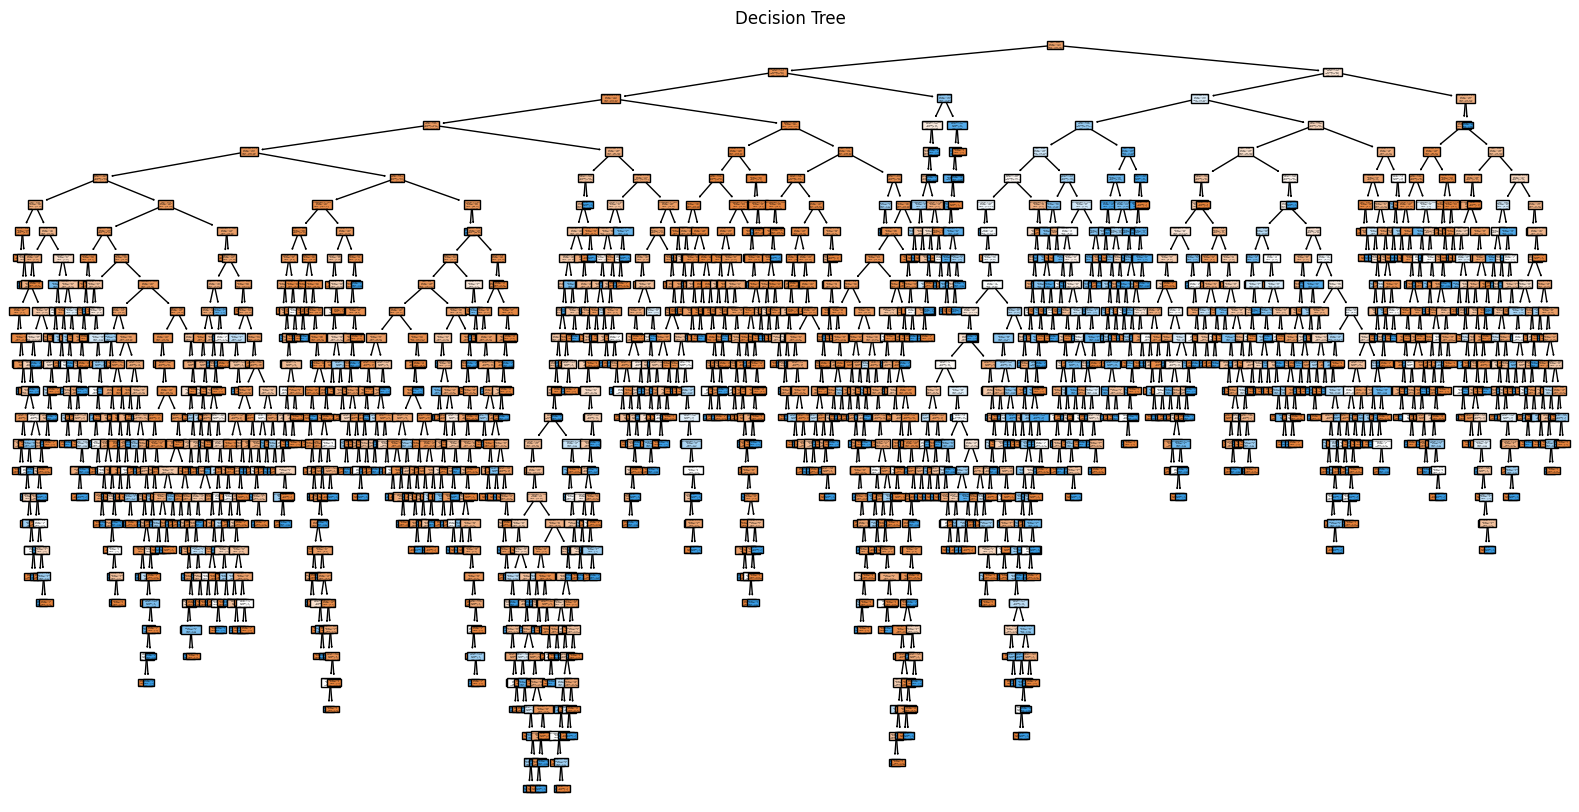

In [27]:
# Plot the decision tree with increased size
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=['Not Exited', 'Exited'])
plt.title("Decision Tree")
plt.show()

# Decision Tree Max Depth 10

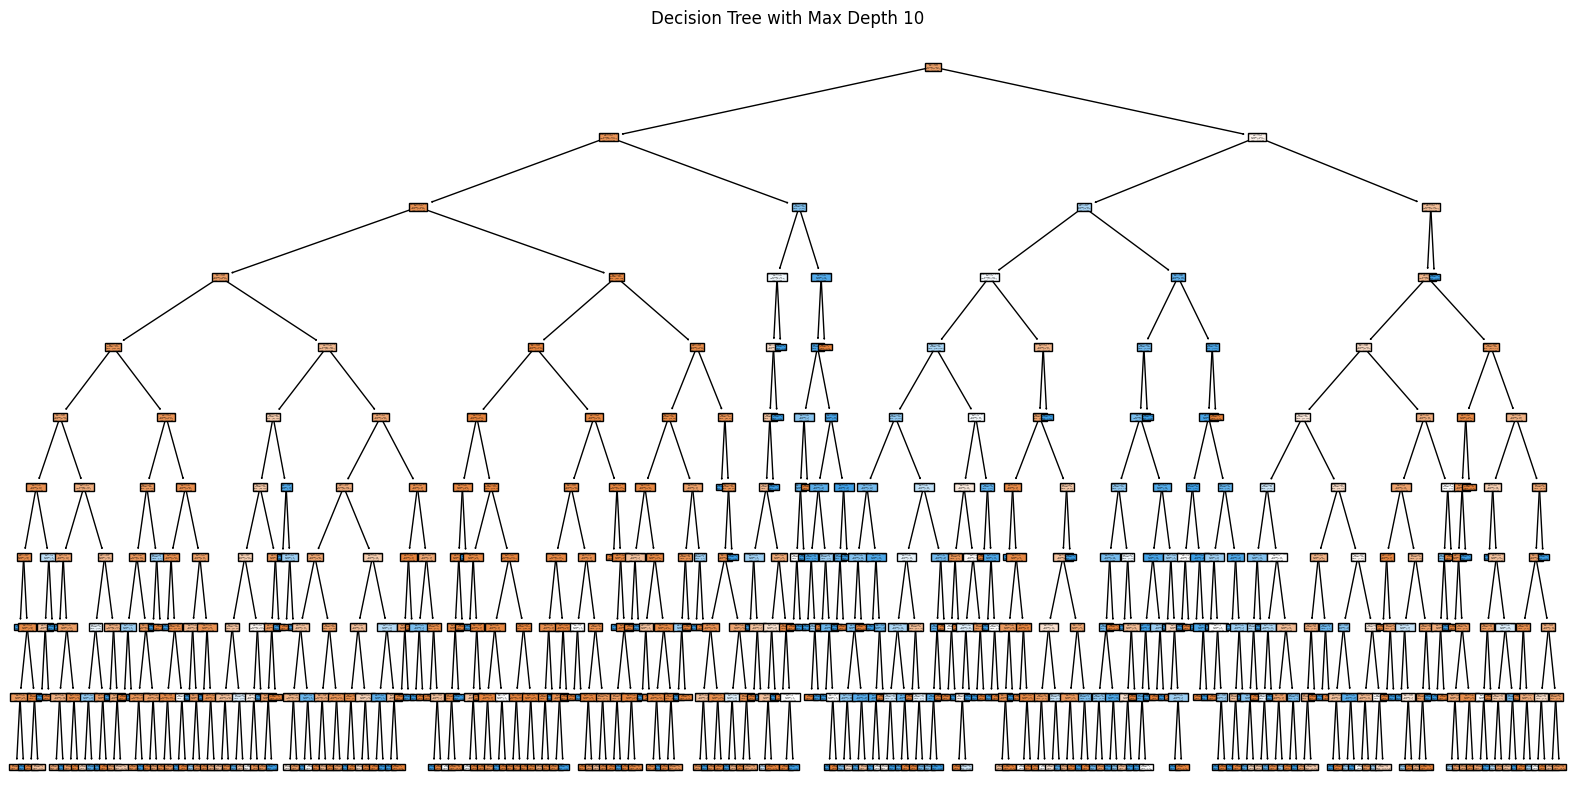

In [28]:
model = DecisionTreeClassifier(max_depth = 10, random_state=42)
model.fit(X_train, Y_train)

# Plot the decision tree with increased size
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=['Not Exited', 'Exited'])
plt.title("Decision Tree with Max Depth 10")
plt.show()

In [29]:
# Check the parameters used in the Decision Tree
print(model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


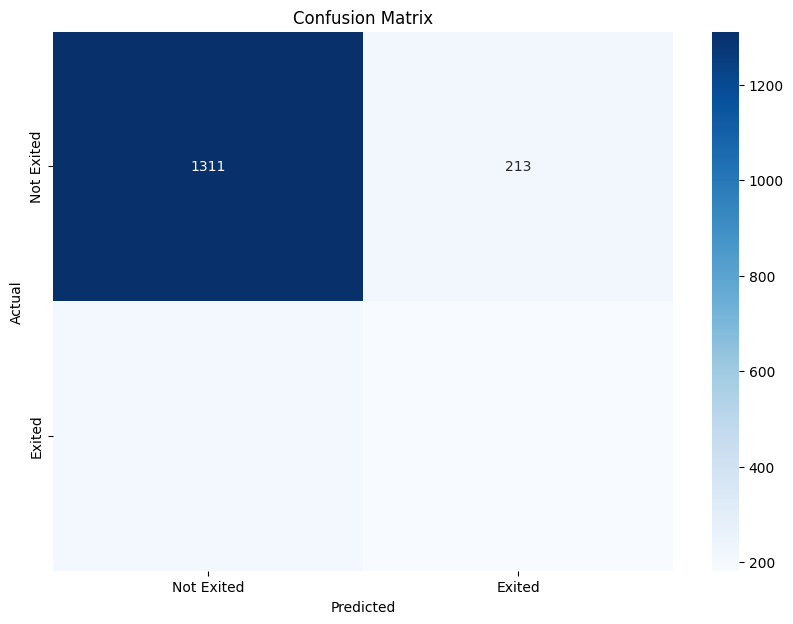

In [30]:
# Generate and plot confusion matrix
conf_matrix = confusion_matrix(Y_test, pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Generate confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(Y_test, pred)
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)

Confusion Matrix (Decision Tree):
[[1311  213]
 [ 208  182]]


# Random Forrest

In [31]:
forest_model = RandomForestClassifier(n_estimators=100, max_depth=4, 
                                      min_samples_split=2, min_samples_leaf=2, 
                                      random_state=42)
forest_model.fit(X_train, Y_train.values.ravel())

forest_pred = forest_model.predict(X_test)

print("Random Forest Predictions:", forest_pred[:5])
print("True Labels:", Y_test.values.ravel()[:5])

Random Forest Predictions: [0 0 0 0 0]
True Labels: [0 0 0 1 0]


In [32]:
test_accuracy = accuracy_score(Y_test, forest_pred)
print("Random Forest Accuracy (Test): {:.3f}".format(test_accuracy))

train_accuracy = accuracy_score(Y_train, forest_model.predict(X_train))
print("Random Forest Accuracy (Train): {:.3f}".format(train_accuracy))

Random Forest Accuracy (Test): 0.839
Random Forest Accuracy (Train): 0.843


In [33]:
forest_accuracy = accuracy_score(Y_test, forest_pred)
print("Random Forest Accuracy (Test): {:.3f}".format(forest_accuracy))

print("Classification Report (Random Forest):")
print(classification_report(Y_test, forest_pred))

Random Forest Accuracy (Test): 0.839
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1524
           1       0.95      0.22      0.36       390

    accuracy                           0.84      1914
   macro avg       0.89      0.61      0.63      1914
weighted avg       0.86      0.84      0.80      1914



In [34]:
from sklearn.metrics import classification_report

# Menggunakan classification report
classification_report_result = classification_report(Y_test, forest_pred, output_dict=True)

# Mendapatkan nilai f1-score
f1_score_result = classification_report_result['macro avg']['f1-score']
print("F1 Score (Random Forest): {:.3f}".format(f1_score_result))

F1 Score (Random Forest): 0.633


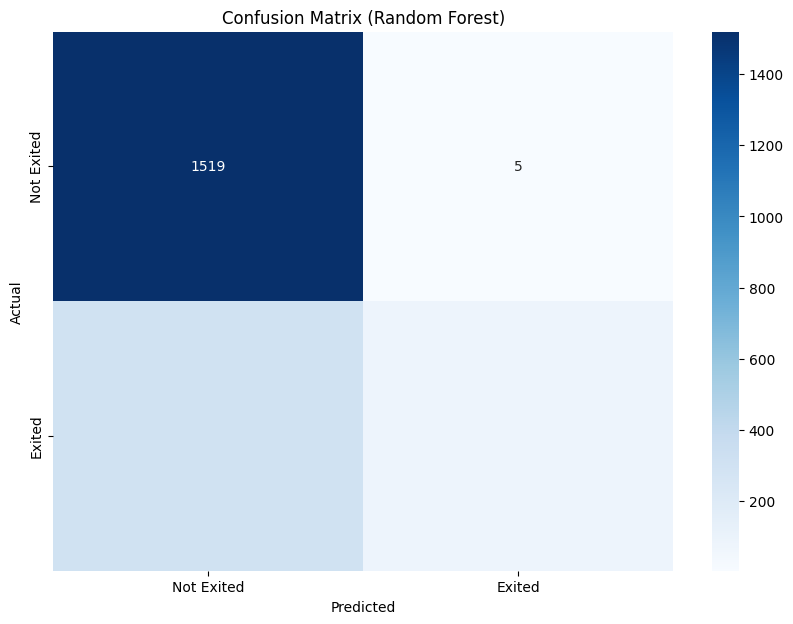

In [35]:
Y_pred = model.predict(X_test)

# Evaluasi kinerja model
accuracy_DT = accuracy_score(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(Y_test, forest_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [41]:
# Generate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(Y_test, forest_pred)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

Confusion Matrix (Random Forest):
[[1519    5]
 [ 304   86]]


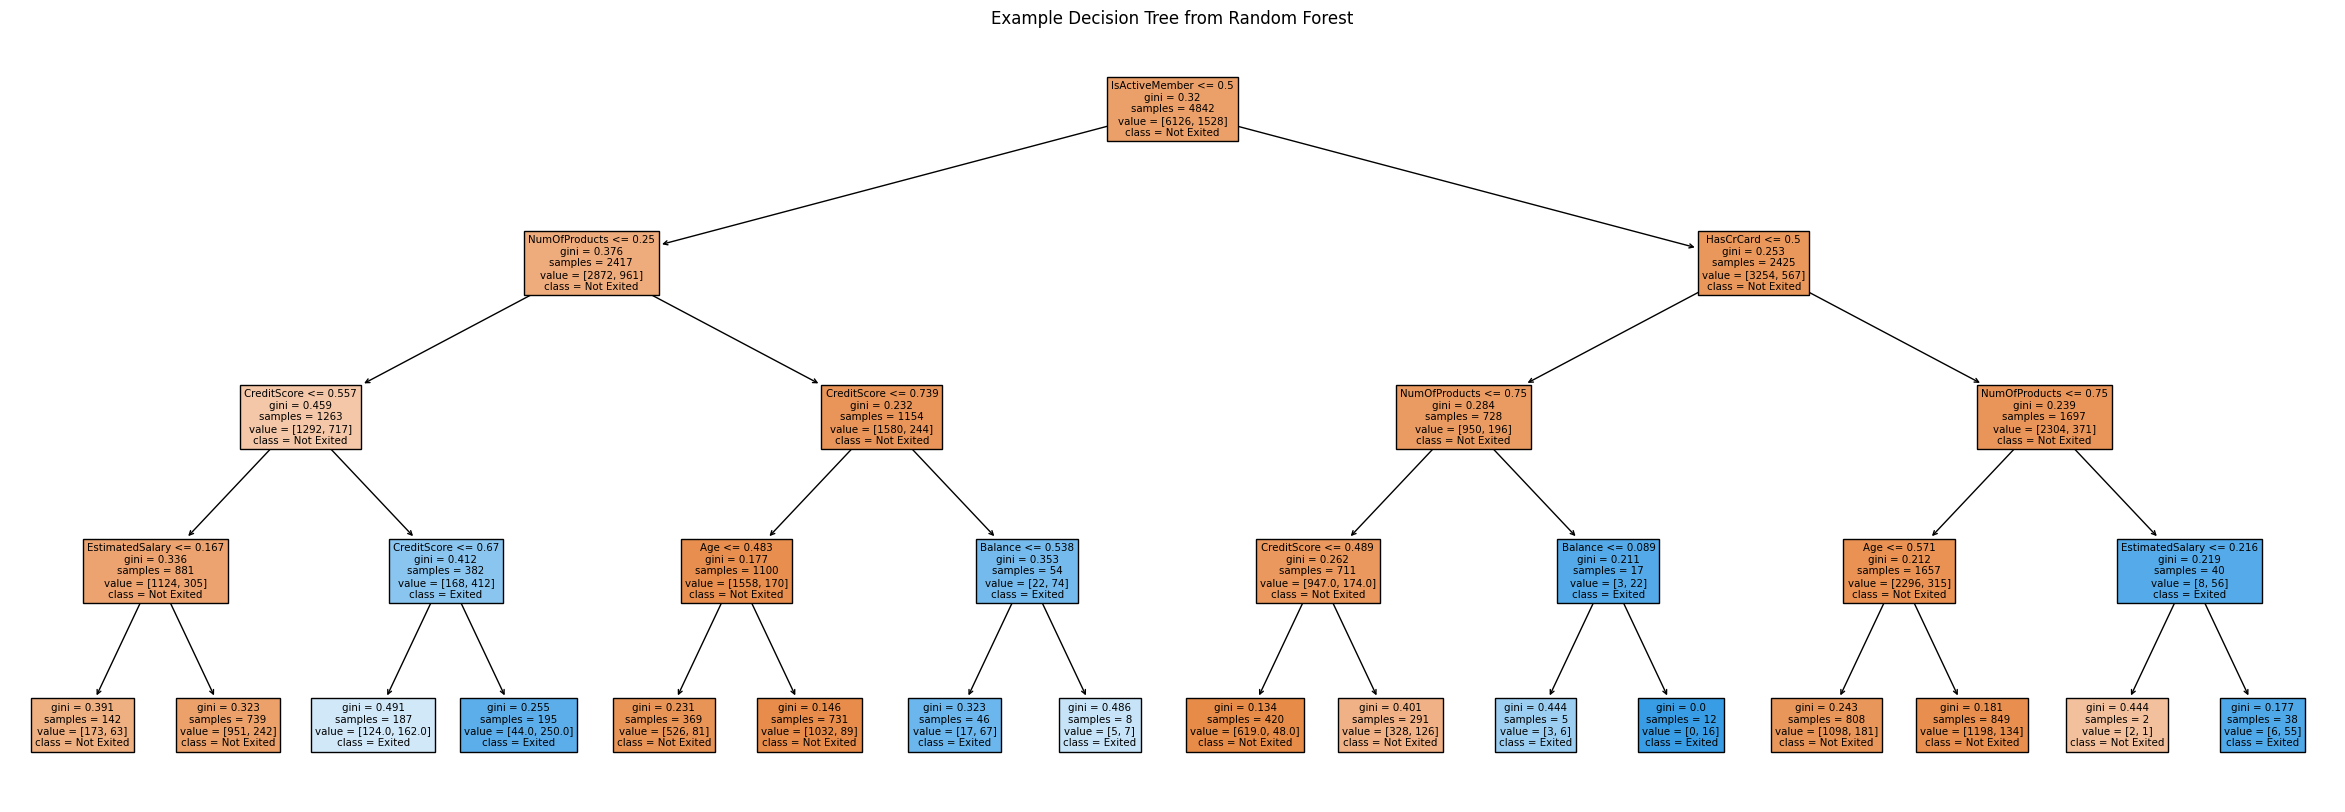

In [36]:
# Reorder feature names with EstimatedSalary first
feature_names_reordered = ['Age','CreditScore','Tenure', 
                           'Balance', 'NumOfProducts','HasCrCard',
                           'IsActiveMember','EstimatedSalary']


# Visualize the decision tree with reorded feature names
plt.figure(figsize=(30, 10))
plot_tree(forest_model.estimators_[0], filled=True, 
          feature_names=feature_names_reordered, 
          class_names=['Not Exited', 'Exited'])
plt.title('Example Decision Tree from Random Forest')
plt.show()

In [37]:
max_depth = forest_model.estimators_[0].tree_.max_depth
num_trees = forest_model.n_estimators
min_samples_split = forest_model.min_samples_split
min_samples_leaf = forest_model.min_samples_leaf
random_state = forest_model.random_state

print("Maximum depth of the tree:", max_depth)
print("Number of trees in the forest:", num_trees)
print("Minimum number of samples required to split an internal node:", min_samples_split)
print("Minimum number of samples required to be at a leaf node:", min_samples_leaf)
print("Random state for reproducibility:", random_state)
#The point of this is to show the parameters 

Maximum depth of the tree: 4
Number of trees in the forest: 100
Minimum number of samples required to split an internal node: 2
Minimum number of samples required to be at a leaf node: 2
Random state for reproducibility: 42


In [38]:
print(forest_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
